# Men's College Basketball (2013 - 2020) Data Analysis Project

## Featured Requirements:
1. Read data from an external file, such as text, JSON, CSV, etc and use that data in your application
2. Visualize data in a graph, chart, or other visual representation of data
3. Use pandas, matplotlib, and/or numpy to perform a data analysis project. Ingest 2 or more pieces of data, analyze that data in some manner, and display a new result to a graph, chart, or other display


## Summary

In this notebook, you will find analysis of some statistical data from Men's College Basketball between 2013 and 2021. The dataset itself provides the following metrics for several teams with the listed date frame. 

* RK (Only in cbb20): The ranking of the team at the end of the regular season according to barttorvik
* TEAM: The Division I college basketball school
*CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
* G: Number of games played
*W: Number of games won
* ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
* ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
* BARTHAG: Power Rating (Chance of beating an average Division I team)
* EFG_O: Effective Field Goal Percentage Shot
* EFG_D: Effective Field Goal Percentage Allowed
* TOR: Turnover Percentage Allowed (Turnover Rate)
* TORD: Turnover Percentage Committed (Steal Rate)
* ORB: Offensive Rebound Rate
* DRB: Offensive Rebound Rate Allowed
* FTR : Free Throw Rate (How often the given team shoots Free Throws)
* FTRD: Free Throw Rate Allowed
* 2P_O: Two-Point Shooting Percentage
* 2P_D: Two-Point Shooting Percentage Allowed
* 3P_O: Three-Point Shooting Percentage
* 3P_D: Three-Point Shooting Percentage Allowed
* ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
* WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
* POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
* SEED: Seed in the NCAA March Madness Tournament
* YEAR: Season

With this information, The big question I want to answer is if there is a link between a team's stats and their Post Season success.



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_theme(context='notebook', style='darkgrid')

In [8]:

df = pd.read_csv('cbb.csv')

# Displays first 5 lines of the dataframe
df.head(25)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


## The Champs

In [9]:
# Extracts Champions from whole dataset then displays Team, Conference, and Seed
# Requirement 
df_champions = df.loc[df['POSTSEASON'] == 'Champions'].sort_values(by=['YEAR'])
df_champions.filter(items=['TEAM', 'CONF', 'YEAR']).style.hide_index()

TEAM,CONF,YEAR
Louisville,BE,2013
Connecticut,Amer,2014
Duke,ACC,2015
Villanova,BE,2016
North Carolina,ACC,2017
Villanova,BE,2018
Virginia,ACC,2019


### Champions by Conference

In [11]:
chips_by_conference = df_champions['CONF'].value_counts().to_dict()
df_chips = pd.DataFrame(list(chips_by_conference.items()), columns = ['Conference', 'Number of Champions'])
df_chips.head().style.hide_index()                        

Conference,Number of Champions
BE,3
ACC,3
Amer,1


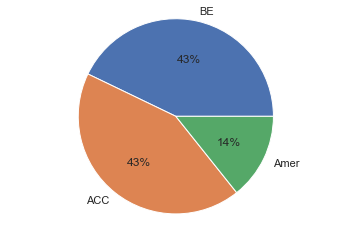

In [101]:
# Pie chart of championships by conference
conference = []
count = []

for x, y in chips_by_conference.items():
    conference.append(x)
    count.append(y)

plt.pie(count, labels=conference, autopct="%.0f%%")
plt.axis('equal')
plt.show()

### Champions' Offensive and Defensive Efficiency

In [17]:
df_champions.filter(items=['TEAM', 'YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

TEAM,YEAR,ADJOE,ADJDE
Louisville,2013,115.900000,84.500000
Connecticut,2014,112.500000,91.300000
Duke,2015,125.200000,90.600000
Villanova,2016,123.100000,90.900000
North Carolina,2017,121.000000,91.500000
Villanova,2018,128.400000,94.100000
Virginia,2019,123.000000,89.900000


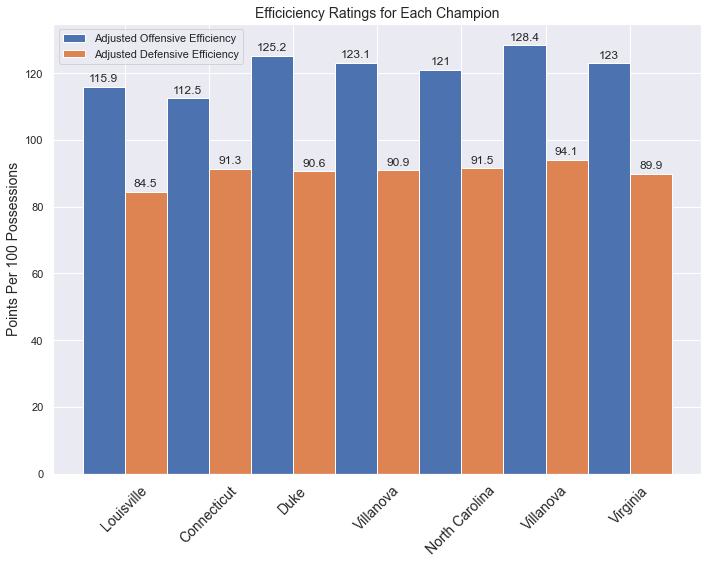

In [18]:
# Bar graph displaying offensive and defensive efficiency ratings of the champs.
x = np.arange(len(df_champions['TEAM'])) 
width = .5 

fig, ax = plt.subplots(figsize=(10,8))
off_effic = ax.bar(x - width/2, df_champions['ADJOE'], width, label='Adjusted Offensive Efficiency')
def_effic = ax.bar(x + width/2, df_champions['ADJDE'], width, label='Adjusted Defensive Efficiency')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Points Per 100 Possessions', fontsize=14)
ax.set_title('Efficiciency Ratings for Each Champion', fontsize=14)
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(df_champions['TEAM'], fontsize=14)
ax.legend()

ax.bar_label(off_effic, padding=3)
ax.bar_label(def_effic, padding=3)

plt.tight_layout()

plt.show()

### Champions' Effective Field Goal Percentages (Actual and Allowed)

In [19]:
df_champions.filter(items=['TEAM', 'YEAR', 'EFG_O', 'EFG_D']).style.hide_index()

TEAM,YEAR,EFG_O,EFG_D
Louisville,2013,50.600000,44.800000
Connecticut,2014,51.500000,44.600000
Duke,2015,56.600000,46.500000
Villanova,2016,56.100000,46.700000
North Carolina,2017,51.700000,48.100000
Villanova,2018,59.500000,48.500000
Virginia,2019,55.200000,44.700000


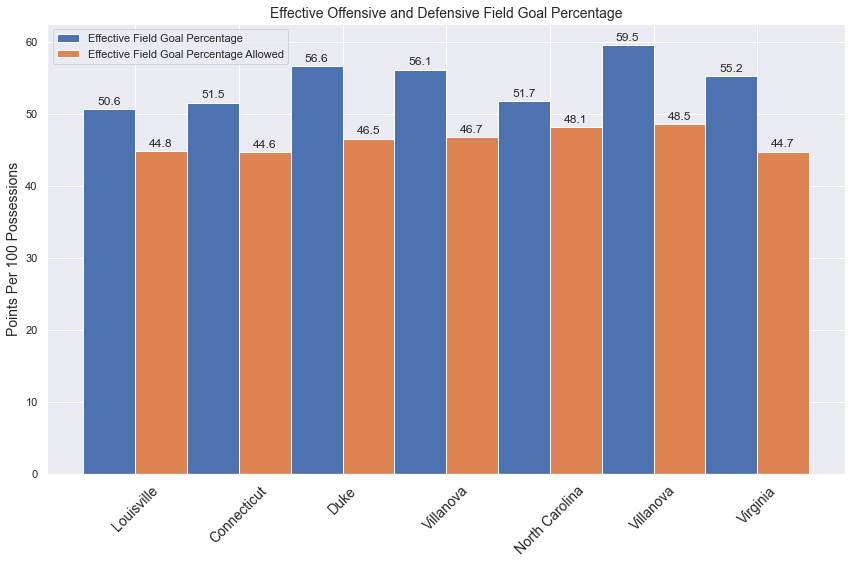

In [26]:
# Bar graph displaying effective offensive and defensive field goal percentage of the champs.
x = np.arange(len(df_champions['TEAM'])) 
width = .5 

fig, ax = plt.subplots(figsize=(12,8))
off_efg = ax.bar(x - width/2, df_champions['EFG_O'], width, label='Effective Field Goal Percentage')
def_efg = ax.bar(x + width/2, df_champions['EFG_D'], width, label='Effective Field Goal Percentage Allowed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Field Goal Percentage', fontsize=14)
ax.set_title('Effective Offensive and Defensive Field Goal Percentage', fontsize=14)
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(df_champions['TEAM'], fontsize=14)
ax.legend()

ax.bar_label(off_efg, padding=3)
ax.bar_label(def_efg, padding=3)

plt.tight_layout()

plt.show()

### Champions' Offensive Rebound Rate (Actual and Allowed)

In [22]:
df_champions.filter(items=['TEAM', 'YEAR', 'ORB', 'DRB']).style.hide_index()

TEAM,YEAR,ORB,DRB
Louisville,2013,38.200000,33.300000
Connecticut,2014,30.400000,32.800000
Duke,2015,35.800000,30.200000
Villanova,2016,28.200000,29.400000
North Carolina,2017,41.300000,25.000000
Villanova,2018,29.600000,27.100000
Virginia,2019,30.400000,25.400000


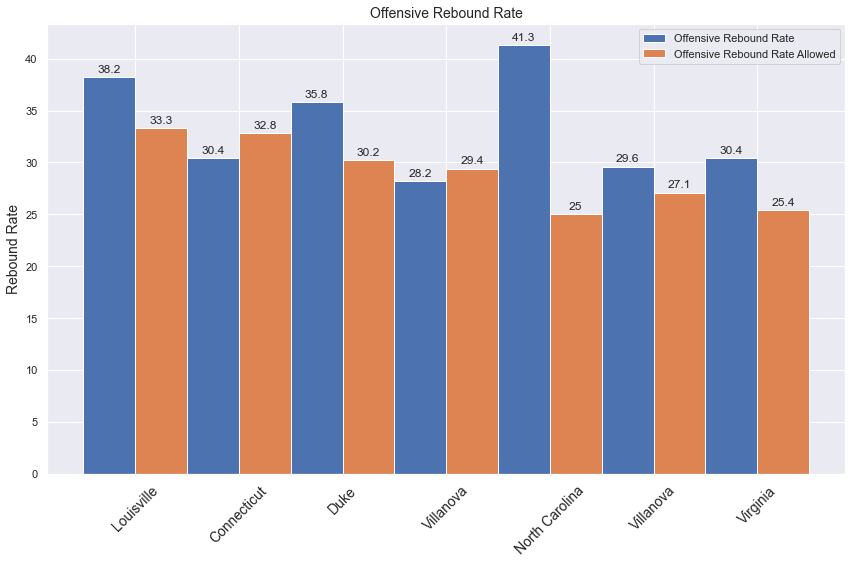

In [51]:
# Bar graph displaying effective offensive and defensive field goal percentage of the champs.
x = np.arange(len(df_champions['TEAM'])) 
width = .5 

fig, ax = plt.subplots(figsize=(12,8))
off_reb = ax.bar(x - width/2, df_champions['ORB'], width, label='Offensive Rebound Rate')
def_reb = ax.bar(x + width/2, df_champions['DRB'], width, label='Offensive Rebound Rate Allowed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rebound Rate', fontsize=14)
ax.set_title('Offensive Rebound Rate', fontsize=14)
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(df_champions['TEAM'], fontsize=14)
ax.legend()

ax.bar_label(off_reb, padding=3)
ax.bar_label(def_reb, padding=3)

plt.tight_layout()

plt.show()

## Champions' Efficiency Over The Years

The following presents each Champion's Offensive and Defensive Efficiency for each proceeding and/or subsequent years.

### Louisville

In [47]:
df_louisville = df.loc[df['TEAM'] == 'Louisville'].sort_values(by=['YEAR'])
df_louisville.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,115.900000,84.500000
2014,118.800000,87.600000
2015,109.400000,87.400000
2016,111.500000,89.600000
2017,117.600000,91.500000
2018,112.000000,96.400000
2019,112.900000,93.100000


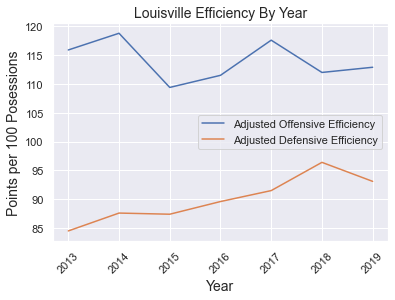

In [84]:
plt.plot(df_louisville['YEAR'], df_louisville['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_louisville['YEAR'], df_louisville['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('Louisville Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Connecticut

In [88]:
df_uconn = df.loc[df['TEAM'] == 'Connecticut'].sort_values(by=['YEAR'])
df_uconn.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,108.700000,93.900000
2014,112.500000,91.300000
2015,105.300000,97.400000
2016,110.500000,93.400000
2017,105.600000,98.300000
2018,104.100000,105.800000
2019,107.800000,101.000000


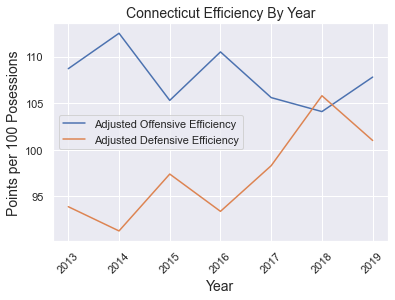

In [89]:
plt.plot(df_uconn['YEAR'], df_uconn['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_uconn['YEAR'], df_uconn['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('Connecticut Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Duke

In [90]:
df_duke = df.loc[df['TEAM'] == 'Duke'].sort_values(by=['YEAR'])
df_duke.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,118.400000,91.500000
2014,125.900000,98.600000
2015,125.200000,90.600000
2016,121.200000,98.900000
2017,122.100000,95.600000
2018,122.300000,92.900000
2019,118.900000,89.200000


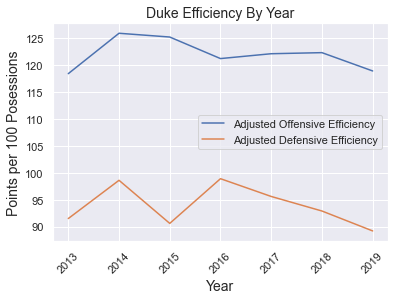

In [94]:
plt.plot(df_duke['YEAR'], df_duke['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_duke['YEAR'], df_duke['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('Duke Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Villanova

In [91]:
df_nova = df.loc[df['TEAM'] == 'Villanova'].sort_values(by=['YEAR'])
df_nova.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,105.300000,90.500000
2014,115.200000,92.500000
2015,121.900000,91.100000
2016,123.100000,90.900000
2017,122.200000,92.500000
2018,128.400000,94.100000
2019,114.600000,98.900000


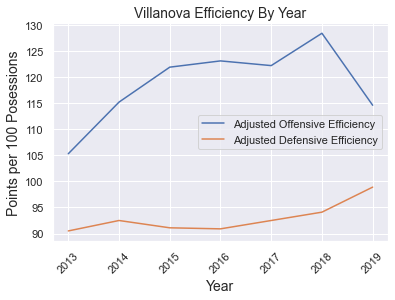

In [95]:
plt.plot(df_nova['YEAR'], df_nova['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_nova['YEAR'], df_nova['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('Villanova Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### North Carolina

In [92]:
df_unc = df.loc[df['TEAM'] == 'North Carolina'].sort_values(by=['YEAR'])
df_unc.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,111.600000,93.000000
2014,113.400000,94.700000
2015,119.600000,92.500000
2016,123.300000,94.900000
2017,121.000000,91.500000
2018,120.700000,97.100000
2019,120.100000,91.400000


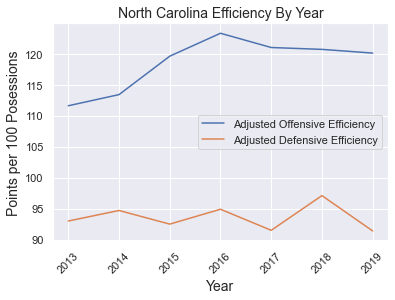

In [96]:
plt.plot(df_unc['YEAR'], df_unc['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_unc['YEAR'], df_unc['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('North Carolina Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### North Carolina

In [93]:
df_virginia = df.loc[df['TEAM'] == 'Virginia'].sort_values(by=['YEAR'])
df_virginia.filter(items=['YEAR', 'ADJOE', 'ADJDE']).style.hide_index()

YEAR,ADJOE,ADJDE
2013,107.400000,90.300000
2014,114.600000,89.500000
2015,112.100000,84.100000
2016,119.900000,91.000000
2017,111.800000,86.900000
2018,114.600000,86.700000
2019,123.000000,89.900000


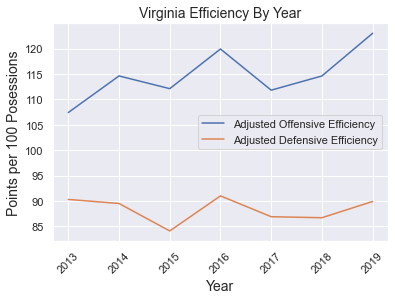

In [97]:
plt.plot(df_virginia['YEAR'], df_virginia['ADJOE'], label='Adjusted Offensive Efficiency')
plt.plot(df_virginia['YEAR'], df_virginia['ADJDE'], label='Adjusted Defensive Efficiency')
plt.title('Virginia Efficiency By Year', fontsize=14)
plt.ylabel('Points per 100 Posessions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Top Offenses

### Top 10 Teams in Offensive Efficiency

In [109]:
df_top_off_eff = df.sort_values(by='ADJOE', ascending=False)
df_top_off_eff[:10].filter(items=['TEAM', 'YEAR', 'ADJOE', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,ADJOE,POSTSEASON
Wisconsin,2015,129.100000,2ND
Villanova,2018,128.400000,Champions
Oklahoma St.,2017,126.800000,R64
Duke,2014,125.900000,R64
Notre Dame,2015,125.300000,E8
Creighton,2014,125.200000,R32
Duke,2015,125.200000,Champions
Michigan,2014,125.000000,E8
Gonzaga,2019,123.400000,E8
Michigan,2017,123.300000,S16


### Top 10 Teams in Effective Field Goal Percentage

In [115]:
df_top_off_fgoal = df.sort_values(by='EFG_O', ascending=False)
df_top_off_fgoal[:10].filter(items=['TEAM', 'YEAR', 'EFG_O', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,EFG_O,POSTSEASON
UCLA,2017,59.800000,S16
William & Mary,2018,59.500000,nan
Villanova,2018,59.500000,Champions
Gonzaga,2019,59.000000,E8
Creighton,2014,58.900000,R32
Belmont,2018,58.800000,nan
Indiana,2016,58.700000,S16
Saint Mary's,2018,58.700000,nan
Belmont,2016,58.600000,nan
South Dakota St.,2019,58.500000,nan


### Top 10 Teams in Offensive Rebounding Rate

In [52]:
df_off_rebound_rate = df.sort_values(by='ORB', ascending=False)
df_off_rebound_rate[:10].filter(items=['TEAM', 'YEAR', 'ORB', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,ORB,POSTSEASON
Minnesota,2013,43.600000,R32
Quinnipiac,2015,42.100000,nan
West Virginia,2016,42.000000,R64
Kentucky,2014,42.000000,2ND
Quinnipiac,2014,41.900000,nan
Baylor,2015,41.900000,R64
Colorado St.,2013,41.400000,R32
Quinnipiac,2013,41.300000,nan
North Carolina,2017,41.300000,Champions
SMU,2016,41.200000,nan


## Top Defenses

### Top 10 Teams in Defensive Efficiency

In [112]:
df_top_def_eff = df.sort_values(by='ADJDE')
df_top_def_eff[:10].filter(items=['TEAM', 'YEAR', 'ADJDE', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,ADJDE,POSTSEASON
Kentucky,2015,84.000000,F4
Virginia,2015,84.100000,R32
Wisconsin,2013,84.300000,R64
Louisville,2013,84.500000,Champions
Georgetown,2013,85.000000,R64
Texas Tech,2019,85.200000,2ND
Michigan,2019,85.600000,S16
Florida,2013,85.700000,E8
Kansas,2013,86.200000,S16
Gonzaga,2017,86.300000,2ND


### Top 10 Teams in Effective Field Goal Percentage Allowed

In [116]:
df_top_def_fgoal = df.sort_values(by='EFG_D')
df_top_def_fgoal[:10].filter(items=['TEAM', 'YEAR', 'EFG_D', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,EFG_D,POSTSEASON
Kentucky,2015,39.600000,F4
Gonzaga,2017,41.100000,2ND
Kansas,2013,41.500000,S16
Southern,2013,41.900000,R64
North Carolina Central,2015,42.100000,nan
Texas,2015,42.100000,R64
Stephen F. Austin,2013,42.200000,nan
Arizona,2014,42.300000,E8
UC Irvine,2014,42.300000,nan
Virginia,2015,42.300000,R32


### Top 10 Teams in Offensive Rebound Rate Allowed

In [117]:
df_off_rebound_allowed = df.sort_values(by='DRB')
df_off_rebound_allowed[:10].filter(items=['TEAM', 'YEAR', 'DRB', 'POSTSEASON']).style.hide_index()

TEAM,YEAR,DRB,POSTSEASON
Boise St.,2018,18.400000,nan
Liberty,2018,20.400000,nan
New Hampshire,2018,21.400000,nan
Loyola Chicago,2019,21.700000,nan
New Hampshire,2017,21.700000,nan
New Hampshire,2016,21.700000,nan
Saint Mary's,2017,21.900000,R32
San Diego,2019,22.000000,nan
South Dakota St.,2014,22.100000,nan
Northern Iowa,2018,22.100000,nan


## Conclusions

1. None of the statistical categories appear to be a clear indicator of post-season success. While some champs are represented in the top 10 lists, it is no more than 2. 
2. Of the tracked stats, Offensive efficiency appears to be the best indicator of possible success. Of the top 10, 5 at least reached the sweet 16. 
3. The amount of offensive rebounds allowed by a team has nearly no affect on a team's success. Only 1 of the top 10 teams reached the post season. 
4. The Big East and ACC have produced the most champions in this time frame. If you consider that Louisville is now in the ACC, one could dub that conference king. 